Remya Kannankandari
C0895293
T3, G1

In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
df = pd.read_csv("/content/Algerian_forest_fires_cleaned.csv")
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [3]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [5]:
#checking null values in each column
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

Effective Handling of Errors


In [6]:
#Number of distinct values in Target column
df['Classes'].nunique()

8

In [7]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [8]:
#Removing the unwanted space in the target column which is shown as distinct values
df['Classes'] = df['Classes'].str.strip()

In [9]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [10]:
#Converting the categorical values to numerical values
df['Classes'] = df['Classes'].replace({'not fire': 0, 'fire': 1})

In [11]:
df['Classes'].unique()

array([0, 1])

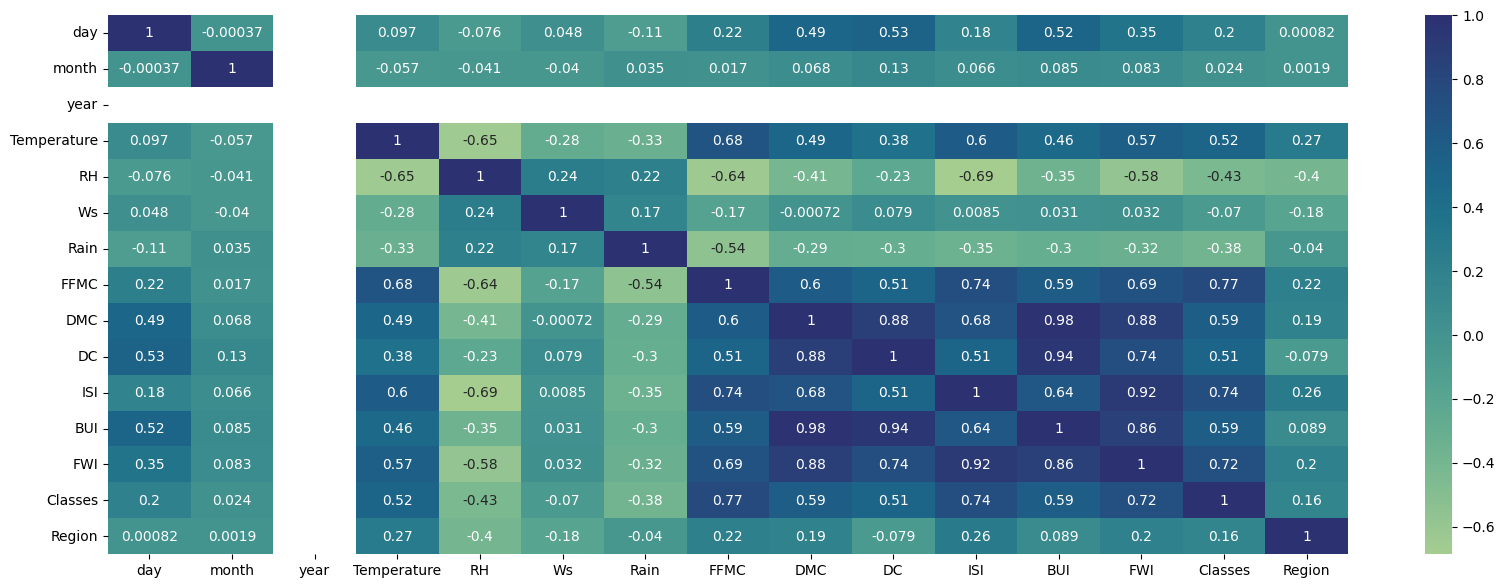

In [12]:
# EDA
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='crest')
plt.show()

In [13]:
# split the data into input and output variable
X=df.drop('Classes', axis=1)
y=df['Classes']

In [14]:
# split the dataset into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [15]:
# model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # Import necessary metrics

# creating an object for model
lr= LinearRegression()

# training the model
lr.fit(X_train, y_train)

y_pred= lr.predict(X_test)


print(f'R2 Score: {r2_score(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R2 Score: 0.6495841148593063
MAE: 0.25055437265300023
MSE: 0.08727559321704906
RMSE: 0.29542442894427173


Feature Selection and Engineering

In [16]:
from sklearn.feature_selection import RFE
rfe= RFE(estimator= LinearRegression(), n_features_to_select=4)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [17]:
rfe.get_feature_names_out()

array(['Rain', 'FFMC', 'FWI', 'Region'], dtype=object)

In [18]:
rfe.ranking_

array([ 9,  7, 11,  8,  4,  5,  1,  1,  2, 10,  3,  6,  1,  1])

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
X.shape

(243, 14)

Data Visualization and Observations

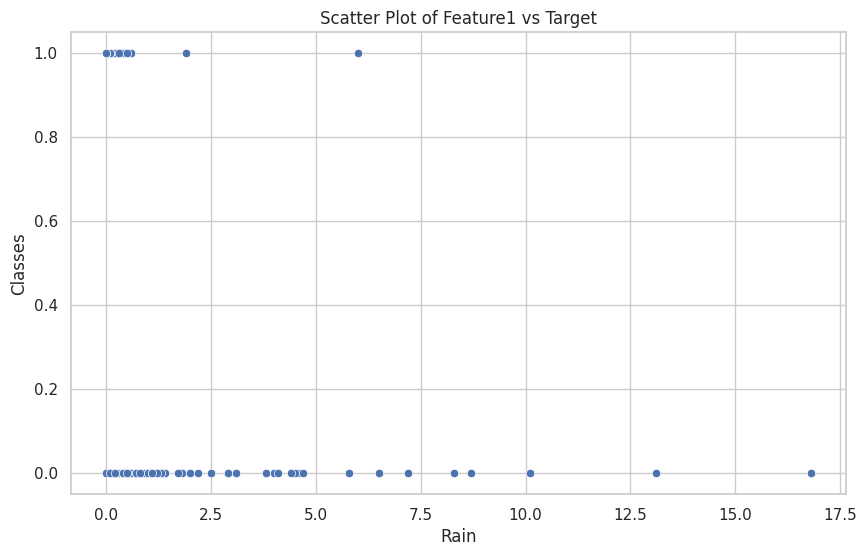

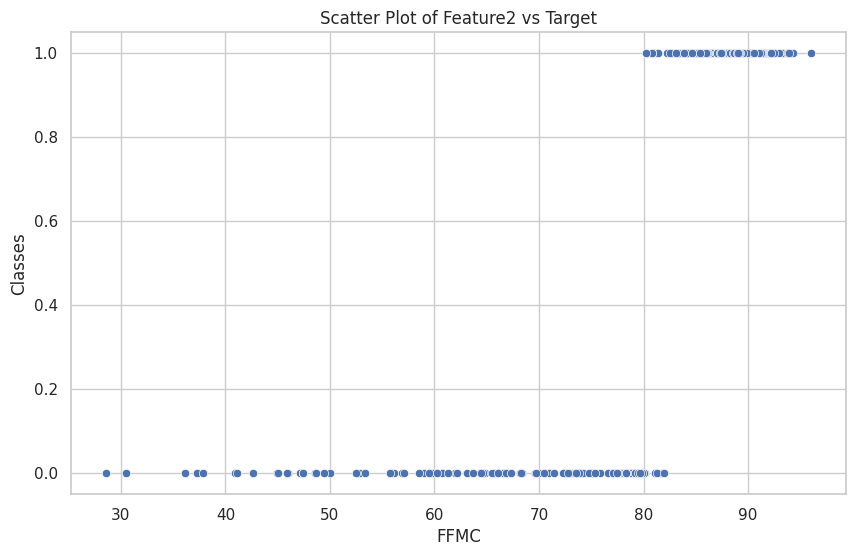

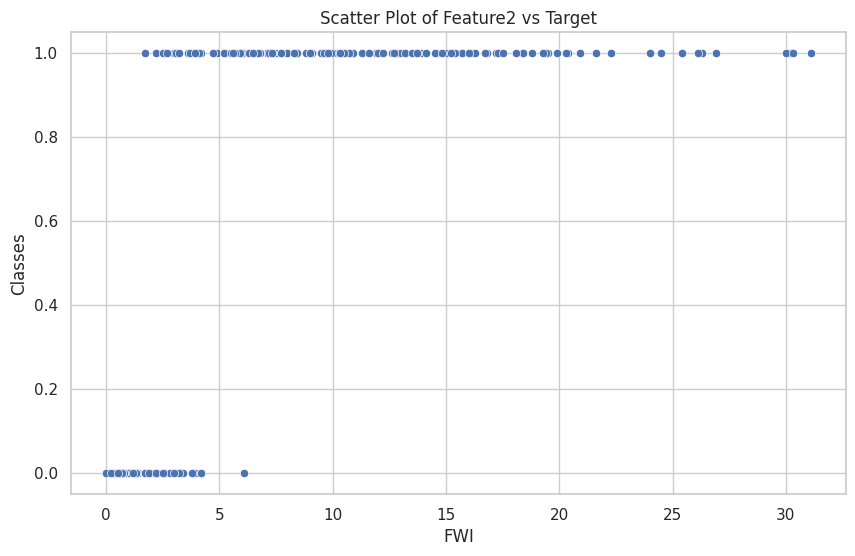

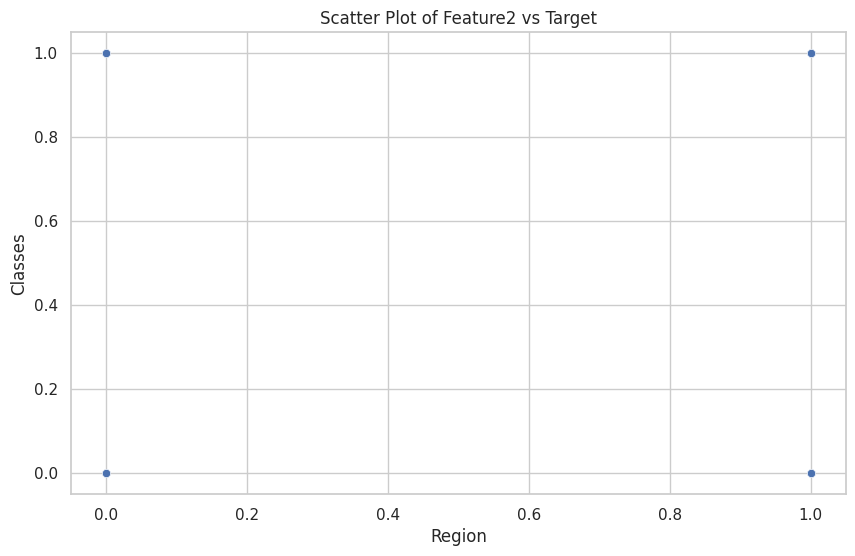

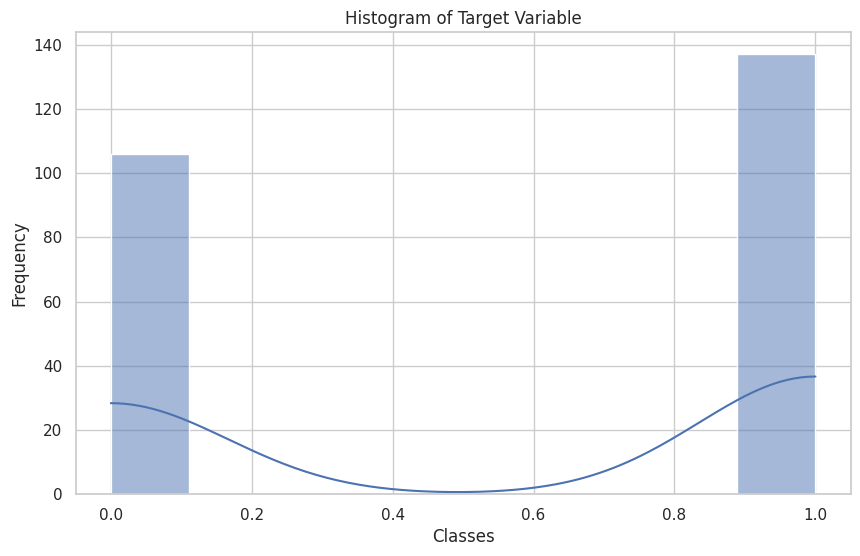

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Scatter Plot for Feature1 vs Target
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rain', y='Classes', marker='o')
plt.title('Scatter Plot of Feature1 vs Target')
plt.xlabel('Rain')
plt.ylabel('Classes')
plt.show()

# 2. Scatter Plot for Feature2 vs Target
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FFMC', y='Classes', marker='o')
plt.title('Scatter Plot of Feature2 vs Target')
plt.xlabel('FFMC')
plt.ylabel('Classes')
plt.show()

# 3. Scatter Plot for Feature2 vs Target
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FWI', y='Classes', marker='o')
plt.title('Scatter Plot of Feature2 vs Target')
plt.xlabel('FWI')
plt.ylabel('Classes')
plt.show()

# 4. Scatter Plot for Feature2 vs Target
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Region', y='Classes', marker='o')
plt.title('Scatter Plot of Feature2 vs Target')
plt.xlabel('Region')
plt.ylabel('Classes')
plt.show()

# 5. Histogram of Target Variable
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Classes', kde=True)
plt.title('Histogram of Target Variable')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()


Observations:
i. This plot makes the connection between Rain and Classes easier to see. The presence of a  linear pattern among the data points indicates a possible correlation between the variables.

ii. There are more cases of fire in the dataset, as indicated by the histogram's larger frequency of Classes = 1.
Given that the distribution is somewhat biassed in the direction of Classes = 1, there may be a class imbalance that affects model training.

iii. While most data points have low rain values, the scatter plot of Rain vs. Classes indicates that higher rainfall is linked to a decreased chance of fire. The class histogram suggests that there may be an imbalance in the classes since there are more fires than there are no fires.

iv. Understanding the dataset and informing subsequent actions, such feature engineering, model selection, and correcting class imbalance in predictive modelling, depend heavily on these visual insights.



Model Development and Analysis

Implementation of Multiple Linear Regression

In [22]:
#Calculate VIF for each feature
vif=  pd.DataFrame()
vif['feature']= X.columns
vif['vif']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,feature,vif
0,day,1.489744
1,month,1.092879
2,year,516.566562
3,Temperature,2.420424
4,RH,2.864164
5,Ws,1.313301
6,Rain,1.551387
7,FFMC,4.121643
8,DMC,83.757620
9,DC,25.628412


In [23]:
X.drop('year', axis=1, inplace=True)

In [24]:
vif=  pd.DataFrame()
vif['feature']= X.columns
vif['vif']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,feature,vif
0,day,6.080459
1,month,40.437088
2,Temperature,104.419593
3,RH,34.711381
4,Ws,35.105570
5,Rain,1.718481
6,FFMC,110.989682
7,DMC,201.440367
8,DC,52.944297
9,ISI,53.205674


In [25]:
X.drop('BUI', axis=1, inplace=True)

In [26]:
vif=  pd.DataFrame()
vif['feature']= X.columns
vif['vif']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,feature,vif
0,day,6.080458
1,month,40.107874
2,Temperature,103.721666
3,RH,34.557693
4,Ws,35.100141
5,Rain,1.712122
6,FFMC,107.236843
7,DMC,33.177637
8,DC,14.549678
9,ISI,51.307729


In [27]:
X.drop('FFMC', axis=1, inplace=True)

In [28]:
vif=  pd.DataFrame()
vif['feature']= X.columns
vif['vif']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,feature,vif
0,day,5.970080
1,month,38.893004
2,Temperature,53.028691
3,RH,34.552960
4,Ws,34.750061
5,Rain,1.479484
6,DMC,31.940071
7,DC,14.473846
8,ISI,44.123705
9,FWI,66.605252


In [29]:
X.drop('FWI', axis=1, inplace=True)

In [30]:
vif=  pd.DataFrame()
vif['feature']= X.columns
vif['vif']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,feature,vif
0,day,5.967144
1,month,38.864114
2,Temperature,49.556629
3,RH,34.520043
4,Ws,34.715151
5,Rain,1.444697
6,DMC,20.180130
7,DC,13.824215
8,ISI,8.361816
9,Region,3.083311


In [31]:
X.drop('Temperature', axis=1, inplace=True)

In [32]:
vif=  pd.DataFrame()
vif['feature']= X.columns
vif['vif']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,feature,vif
0,day,5.924866
1,month,29.037577
2,RH,31.781933
3,Ws,33.591145
4,Rain,1.429271
5,DMC,20.131655
6,DC,13.793119
7,ISI,7.442160
8,Region,2.939862


In [33]:
X.drop('Ws', axis=1, inplace=True)

In [34]:
vif=  pd.DataFrame()
vif['feature']= X.columns
vif['vif']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,feature,vif
0,day,5.860916
1,month,27.784316
2,RH,18.995386
3,Rain,1.357269
4,DMC,19.842960
5,DC,13.707524
6,ISI,6.012117
7,Region,2.931066


In [35]:
X.drop('month', axis=1, inplace=True)

In [36]:
vif=  pd.DataFrame()
vif['feature']= X.columns
vif['vif']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,feature,vif
0,day,5.816792
1,RH,4.192338
2,Rain,1.330592
3,DMC,19.367501
4,DC,13.400098
5,ISI,4.508129
6,Region,2.683052


In [37]:
X.drop('DMC', axis=1, inplace=True)

In [38]:
vif=  pd.DataFrame()
vif['feature']= X.columns
vif['vif']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,feature,vif
0,day,5.727715
1,RH,4.060516
2,Rain,1.321526
3,DC,4.195606
4,ISI,3.493813
5,Region,2.197398


                            OLS Regression Results                            
Dep. Variable:                Classes   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.07
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           9.78e-13
Time:                        19:25:23   Log-Likelihood:                -110.96
No. Observations:                 194   AIC:                             227.9
Df Residuals:                     191   BIC:                             237.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5670      0.031     18.279      0.0

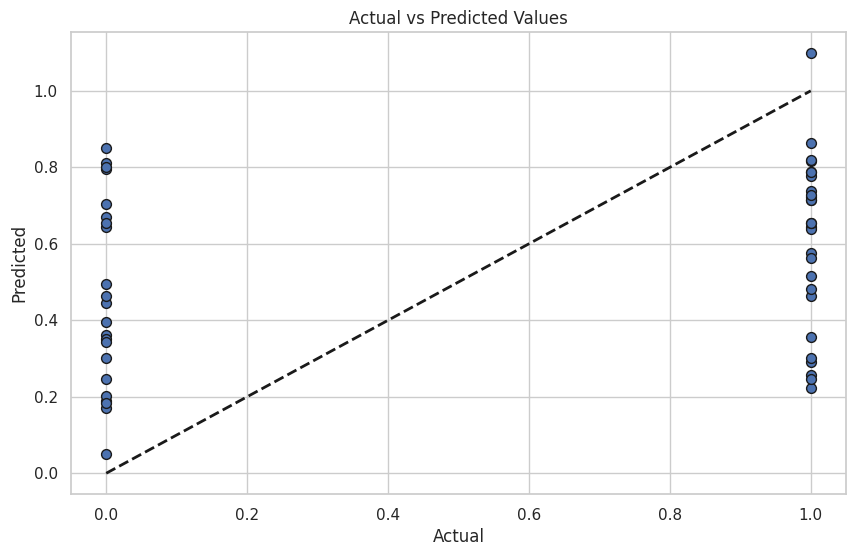

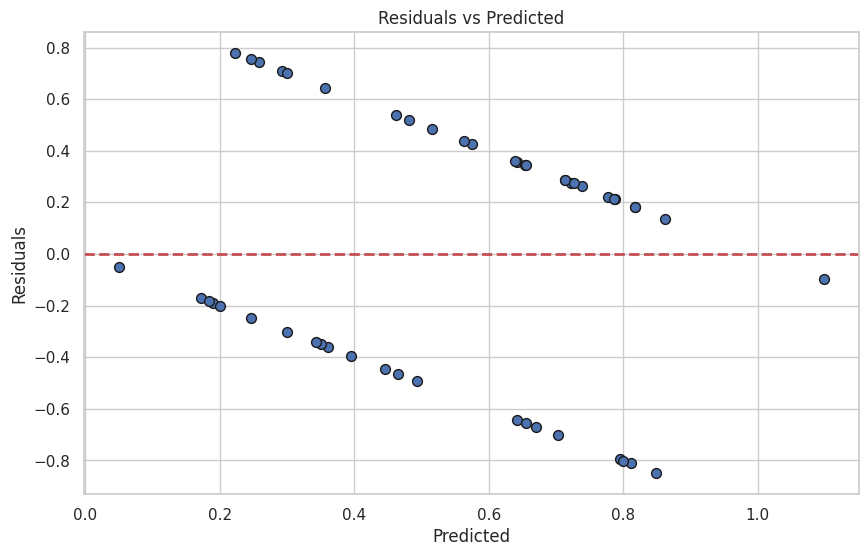

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets
# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assuming some feature reduction process, for example, selecting the first two features
X_train_reduced = X_train_scaled[:, :2]
X_test_reduced = X_test_scaled[:, :2]

# Adding a constant term for the intercept in the model
X_train_reduced = sm.add_constant(X_train_reduced)
X_test_reduced = sm.add_constant(X_test_reduced) # Also add constant to test set

# Creating and fitting the OLS model
model = sm.OLS(y_train, X_train_reduced).fit()

# Making predictions on the test set and training set
y_test_pred = model.predict(X_test_reduced)
y_train_pred = model.predict(X_train_reduced) # Predict on the training set

# Displaying model summary
print(model.summary())

#Evaluating the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nTraining set performance:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2):", r2_train)

print("\nTesting set performance:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2):", r2_test)

#Visualising the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolor='k', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Visualization: Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, edgecolor='k', s=50)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

Implementation of Polynomial Regression Models

In [44]:
# polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2, include_bias= False)

X_poly= poly.fit_transform(X)

In [45]:
X_poly.shape

(243, 27)

In [46]:
#evaluating the model
X_tr_poly, X_te_poly, y_tr, y_te = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [47]:
lr.fit(X_tr_poly, y_tr)


LinearRegression()

In [48]:
y_pred_poly= lr.predict(X_te_poly)

In [49]:
#Evaluating the model
print(f'R2 Score: {r2_score(y_test, y_pred_poly)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_poly)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_poly)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly))}')


R2 Score: 0.6771857022736693
MAE: 0.20258347932073875
MSE: 0.07986326232796355
RMSE: 0.2826008887600383


Regularisation: Lasso

In [50]:
#importing libraries
from sklearn.linear_model import Lasso

#Training the Lasso regression model
ls = Lasso(alpha =0.0001)
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)

#Evaluating the model
print(f'R2 Score: {r2_score(y_test, y_pred_poly)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_poly)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_poly)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly))}')

R2 Score: 0.6771857022736693
MAE: 0.20258347932073875
MSE: 0.07986326232796355
RMSE: 0.2826008887600383


Ridge Regularization

In [51]:
#importing libraries
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Step 5: Standardising your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Training the Ridge regression model
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge.fit(X_train_scaled, y_train)

# Step 7: Making predictions
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

# Step 8: Evaluating the model
print("Training set")
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("R2 Score:", r2_score(y_train, y_train_pred))
print("Testing set")
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R2 Score:", r2_score(y_test, y_test_pred))

Training set
MSE: 0.0984166754918359
R2 Score: 0.599133117011825
Testing set
MSE: 0.12115097349174236
R2 Score: 0.5102971593372502


Cross Validation

In [52]:
# applying cross validation
from sklearn.model_selection import cross_val_score

cvs= cross_val_score(lr, X, y, cv=5)

cvs.mean()

0.4085154977637311

Hyperparameter Tuning

In [53]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Spliting your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardising your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the model
ridge = Ridge()

# Defining the hyperparameters and perform grid search
param_grid = {'alpha': np.logspace(-4, 4, 50)}
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Performing hyperparameter tuning
grid_search.fit(X_train_scaled, y_train)

# Getting the best hyperparameter
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Traing the Ridge regression model with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)

# Making predictions
y_train_pred = ridge_best.predict(X_train_scaled)
y_test_pred = ridge_best.predict(X_test_scaled)

# Evaluating the model
print("Training set")
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("R2 Score:", r2_score(y_train, y_train_pred))
print("Testing set")
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R2 Score:", r2_score(y_test, y_test_pred))

Best alpha: 5.428675439323859
Training set
MSE: 0.09861275822258209
R2 Score: 0.5983344406423052
Testing set
MSE: 0.1225475044275674
R2 Score: 0.504652259039412


Evaluating Model Performance and Testing on unseen data

Best alpha: 5.428675439323859

Testing set performance:
Mean Squared Error (MSE): 0.1225475044275674
R-squared (R2): 0.504652259039412


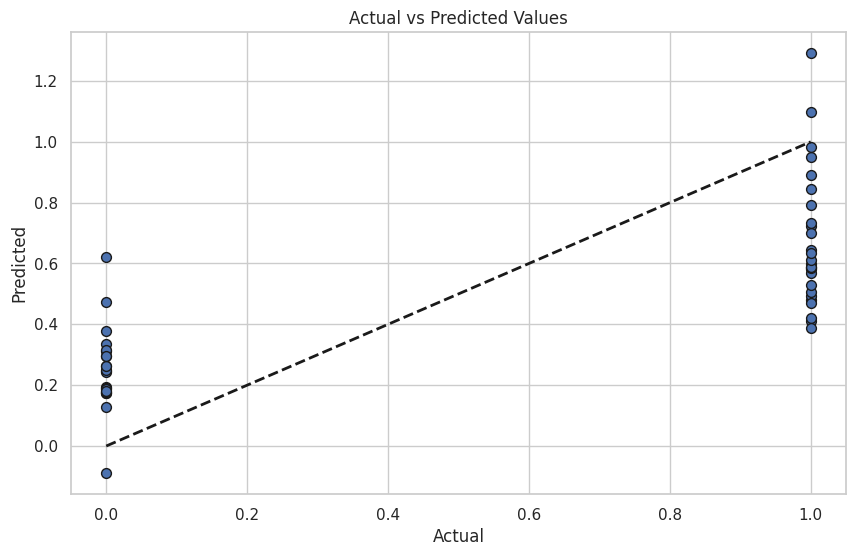


Analysis of Results
Best alpha value: 5.428675439323859
MSE: 0.1225475044275674
R2 Score : 0.504652259039412
The scatter plot shows the actual vs. predicted values.
The closer the points are to the line y=x, the better the model's predictions.


In [54]:
#importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Standardising your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the model
ridge = Ridge()

# Defining the hyperparameters and performing grid search
param_grid = {'alpha': np.logspace(-4, 4, 50)}
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Performing hyperparameter tuning
grid_search.fit(X_train_scaled, y_train)

# Getting the best hyperparameter
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Traing the Ridge regression model with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_test_pred = ridge_best.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print("\nTesting set performance:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Visualising the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolor='k', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Analysing results
print("\nAnalysis of Results")
print(f"Best alpha value: {best_alpha}")
print(f"MSE: {mse}")
print(f"R2 Score : {r2}")
print("The scatter plot shows the actual vs. predicted values.")
print("The closer the points are to the line y=x, the better the model's predictions.")